In [21]:
from PIL import Image
import numpy as np
import pickle

In [19]:
def load_data(pack):
    with open(f'{pack}.pkl', 'rb') as file:
        data = pickle.load(file)
    return data

In [9]:
test = np.random.randint(0, 10, (4, 2, 2, 3))

In [30]:
test.max(axis=(-1, -2))

array([[8, 5],
       [5, 9],
       [4, 9],
       [9, 8]])

In [55]:
def draw(image, width, 
         save_as=None,
         pack='data/colors', 
         styles='all', 
         background=(0, 0, 0), 
         disp=True):

    esize = 50
    
    data = load_data(pack)

    # Creating indices for styles in RGBA matrices
    if styles == 'all' or not isinstance(styles, str):
        styles = 'tagf'
    style_indices = [i for i in range(4) 
                     if 'tagf'[i] in styles]
    if not style_indices:
        style_indices = [*range(4)]

    # Leave only data for specified styles
    data['matrices'] = data['matrices'][style_indices]
    data['averages'] = data['averages'][style_indices]
    data['areas'] = data['areas'][style_indices]

    # Preparing image
    source = Image.open(f'{image}')
    if disp:
        source_w, source_h = source.size
        print(f'Image size: {source_h}x{source_w}', end='')
    # Reducing image size and leave only RGB channels
    source.thumbnail((width, -1))
    source_w, source_h = source.size
    if disp:
        print(f' → {source_h}x{source_w}')
    # Result emoji art image size
    result_h, result_w = source_h * esize, source_w * esize

    source = np.array(source)[:, :, :3]
    # averages: (4, N, 3) -> (4, N, 3)
    # source:   (h, w, 3) -> (h, w, 1, 1, 3)
    # sum:      (h, w, 4N)
    best_i = ((data['averages'].reshape(-1, 3) - source[..., None, :]) ** 2).sum(axis=-1).argmin(axis=-1)
    # s = ((data['averages'] - source[..., None, None, :]) ** 2).sum(axis=-1)

    # matrices: (4, N, 50, 50, 4)
    # best_i:   (h, w)

    test = data['matrices'].reshape(-1, *data['matrices'].shape[2:])[best_i]
    print(test.shape)
    return test
    # return Image.fromarray(test.reshape(result_h, result_w, 4))

In [57]:
%%time
img = draw('images/frog.png', 60, pack='data/flags')
# img

Image size: 1080x1080 → 60x60
(60, 60, 50, 50, 4)
CPU times: user 246 ms, sys: 31 ms, total: 277 ms
Wall time: 290 ms


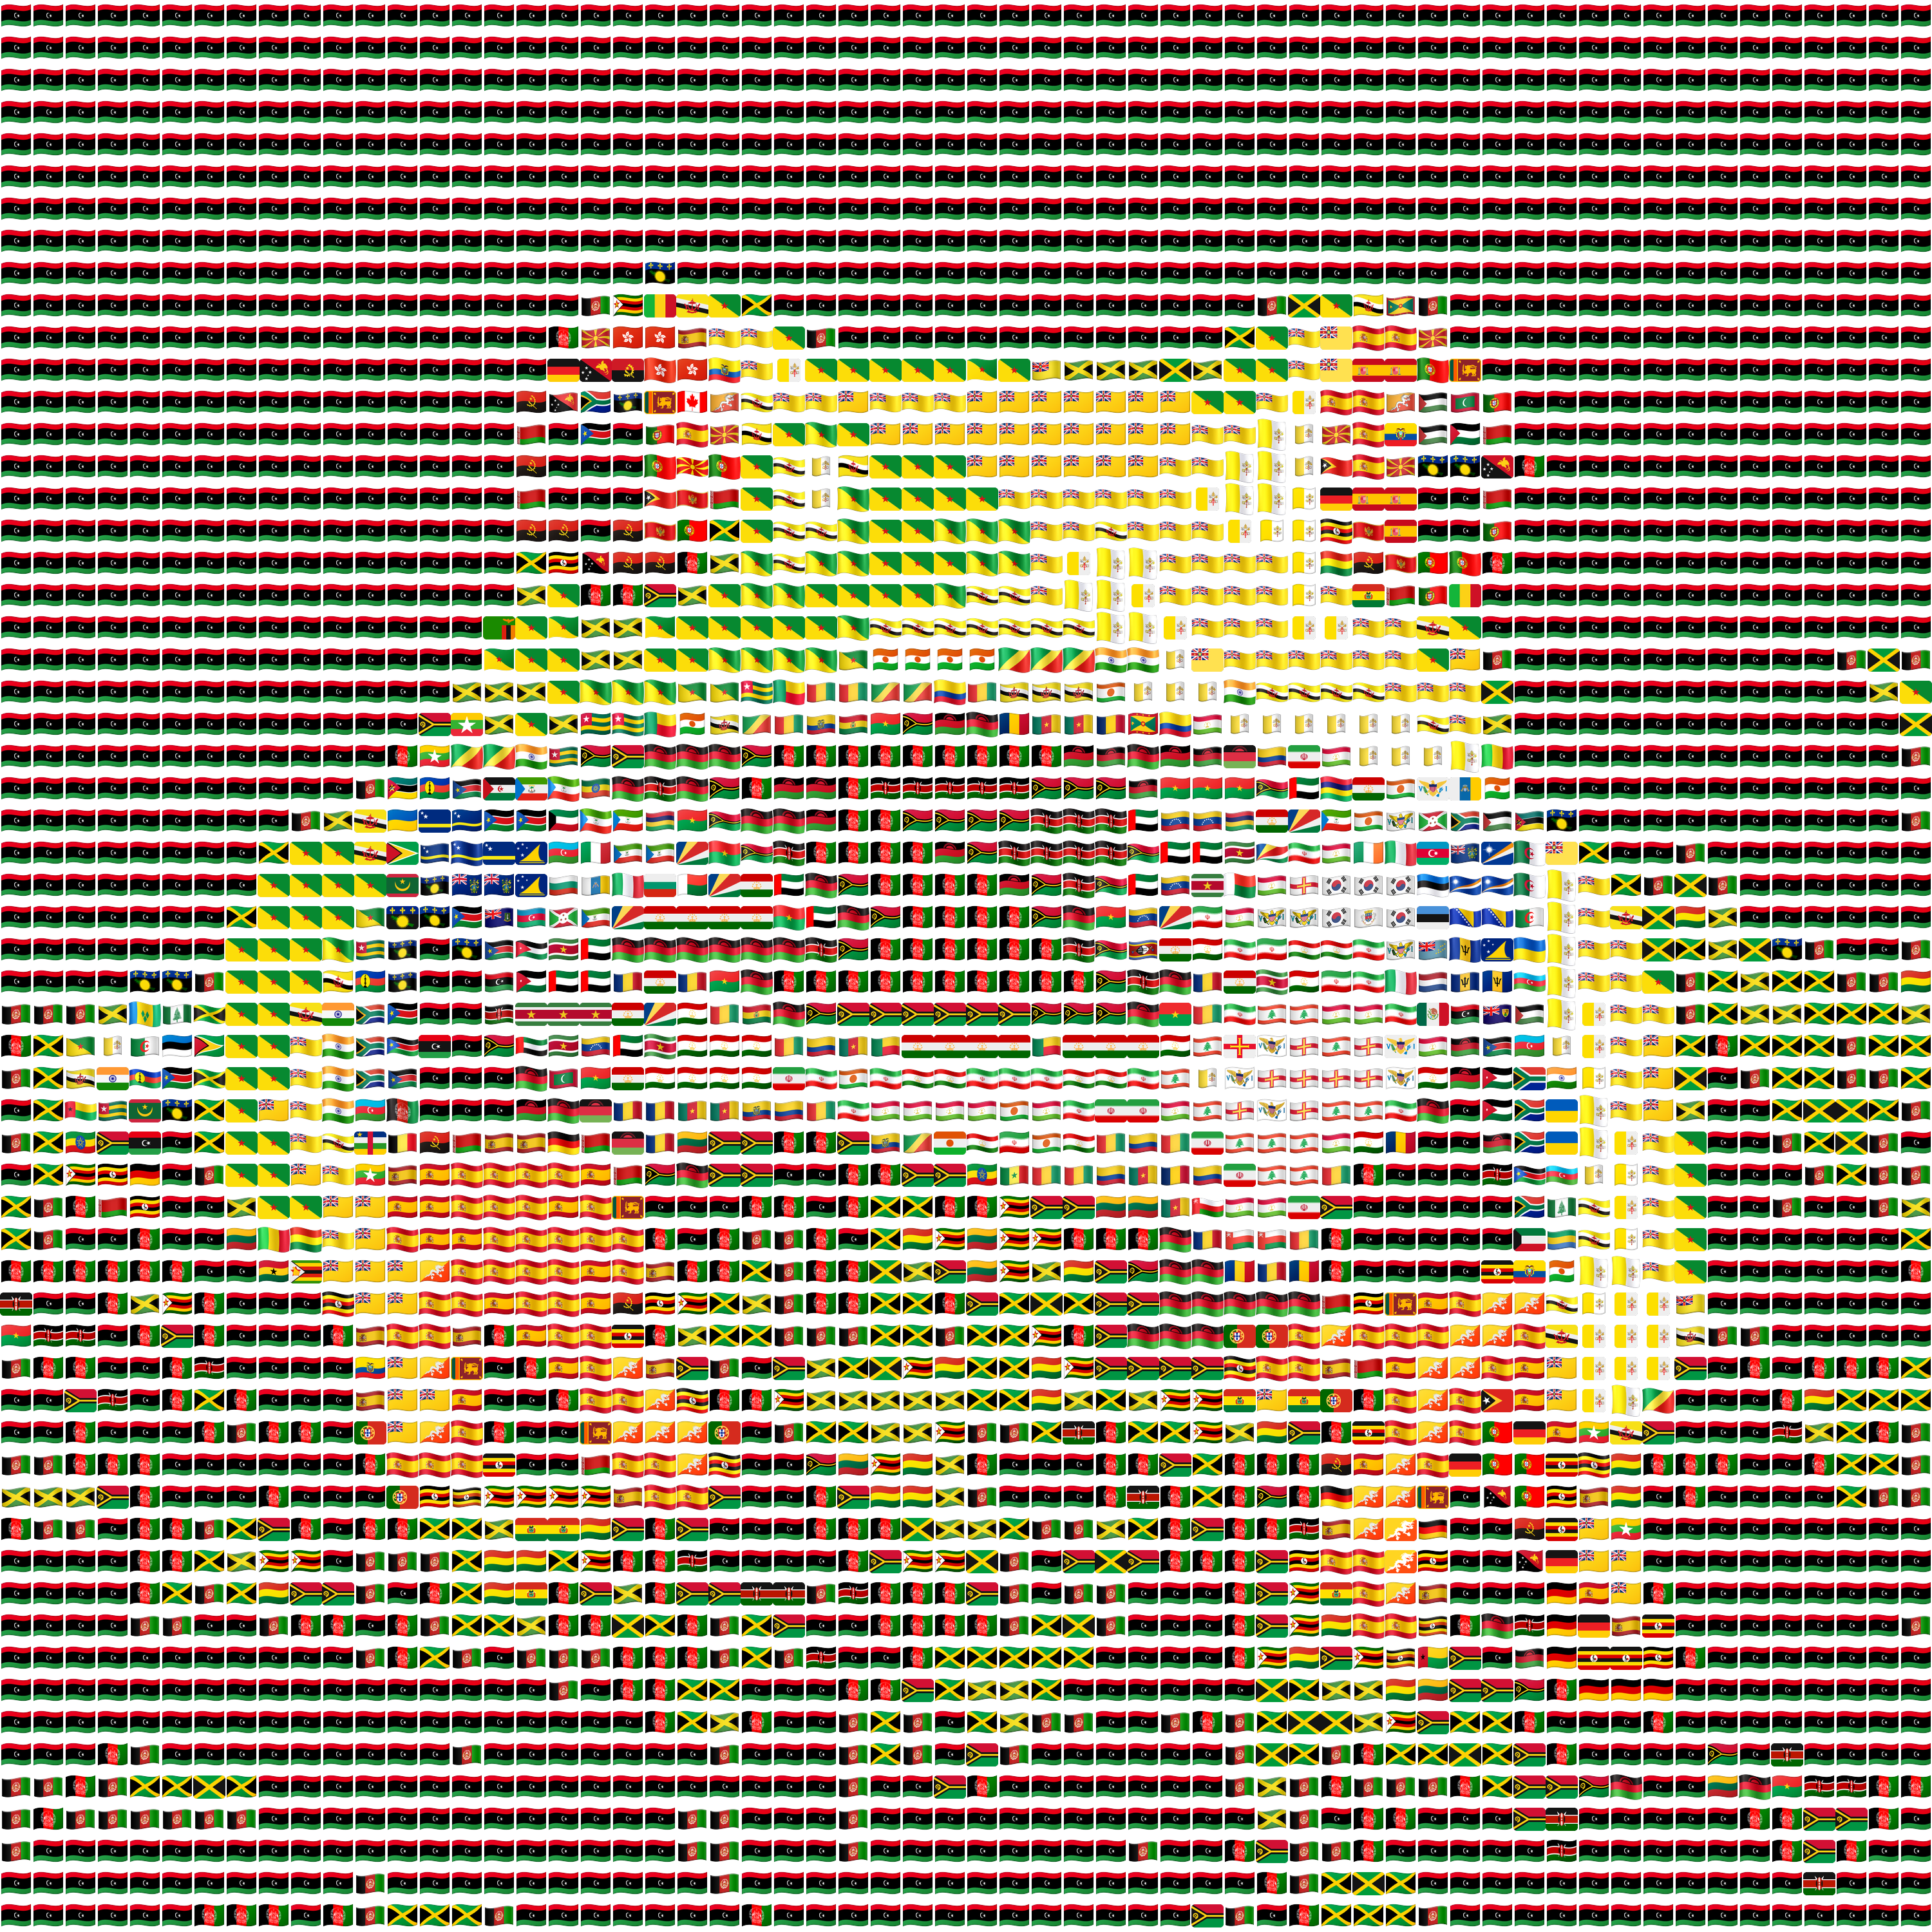

In [61]:
Image.fromarray(img.transpose(0, 2, 1, 3, 4).reshape(3000, 3000, 4))